### What is a Decision Tree Classifier?
A Decision Tree Classifier is a tree-like model that uses features of the data to make decisions and predictions. Each node in the tree represents a decision rule, and each branch represents an outcome of the rule.

- **Root Node**: Represents the entire dataset and splits into child nodes.
- **Internal Nodes**: Represent decisions made based on a feature.
- **Leaf Nodes**: Represent the final outcome or class.


In [135]:
import pandas as pd

In [137]:
#import data
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [139]:
df.shape

(200, 6)

In [143]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Age Distrubution By Drug')

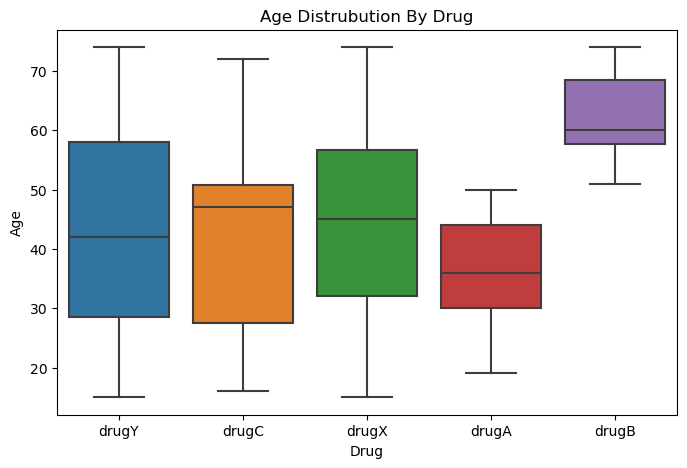

In [77]:
#Visualizing Age vs Drug
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x= 'Drug', y = 'Age')
plt.title("Age Distrubution By Drug")

C:\Users\aakas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aakas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


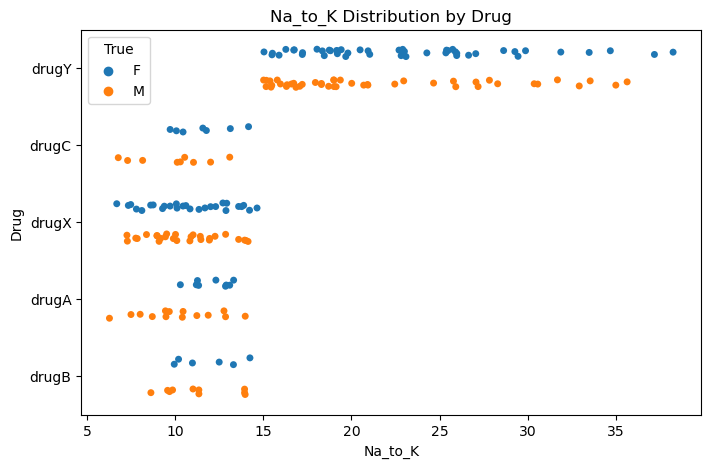

In [79]:
# Visualizing Na_to_K vs Drug
plt.figure(figsize=(8,5))
sns.stripplot(data = df , x = "Na_to_K", y = "Drug", hue = "Sex", dodge=True)
plt.title("Na_to_K Distribution by Drug")
plt.legend(title =True)

Text(0.5, 1.0, 'BP Levels by Drugs')

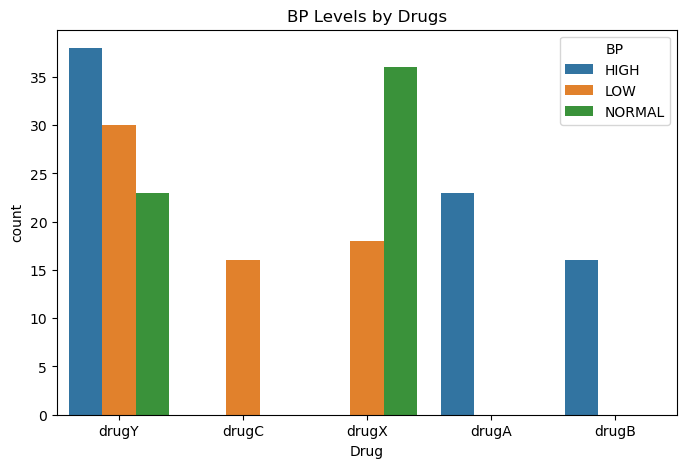

In [81]:
#Visualizing BP vs Drug
plt.figure(figsize = (8,5))
sns.countplot(data = df , x = "Drug", hue = "BP")
plt.title("BP Levels by Drugs")

Text(0.5, 1.0, 'Cholesterol Levels by Drugs')

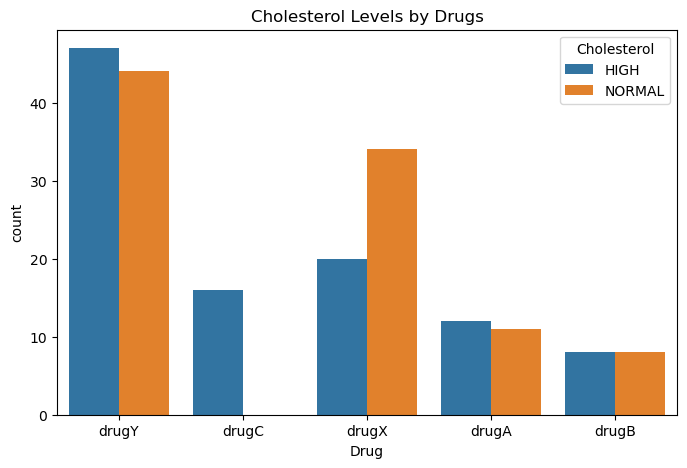

In [83]:
#Visualizing Cholesterol vs Drug
plt.figure(figsize = (8,5))
sns.countplot(data = df , x = "Drug", hue = "Cholesterol")
plt.title("Cholesterol Levels by Drugs")

Text(0.5, 1.0, 'Sex Distribution By Drug')

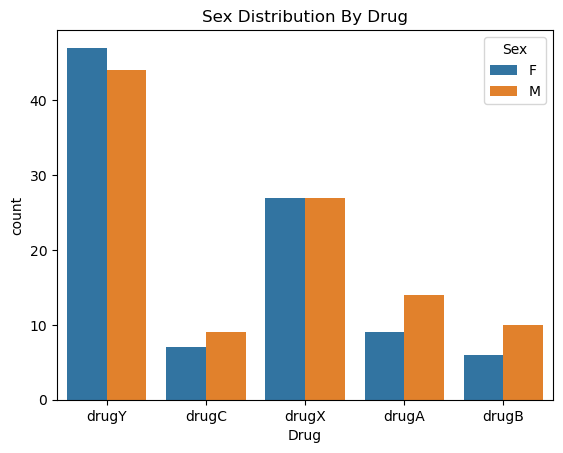

In [85]:
#Visualizing Sex vs Drug
sns.countplot(data =df , x="Drug", hue = "Sex")
plt.title("Sex Distribution By Drug")

In [87]:
from sklearn.preprocessing import LabelEncoder

In [89]:
Leb_code = LabelEncoder()

In [91]:
df["Sex_code"] = Leb_code.fit_transform(df['Sex'])
df["BP_code"] = Leb_code.fit_transform(df['BP'])
df["Cholestorel_code"] = Leb_code.fit_transform(df["Cholesterol"])

In [93]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_code,BP_code,Cholestorel_code
195,56,F,LOW,HIGH,11.567,drugC,0,1,0
75,26,M,LOW,NORMAL,20.909,drugY,1,1,1
196,16,M,LOW,HIGH,12.006,drugC,1,1,0
166,58,F,LOW,HIGH,26.645,drugY,0,1,0
18,23,M,LOW,HIGH,7.298,drugC,1,1,0


In [95]:
X = df.drop(columns=['Sex', 'BP', 'Cholesterol', 'Drug'])
X.head()

,Age,Na_to_K,Sex_code,BP_code,Cholestorel_code
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0


In [97]:
y = df[['Drug']]

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [147]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [103]:
X_train.shape

(150, 5)

### Preventing Overfitting in Decision Trees
1. **`max_depth`**: Limits the depth of the tree to prevent over-complexity.
2. **`min_samples_split`**: Ensures a minimum number of samples are present before a split.
3. **`min_samples_leaf`**: Ensures leaf nodes have a minimum number of samples.


In [105]:
param_grid = {
    "criterion": ["gini", "entropy"],  # Functions to measure split quality
    "max_depth": [3, 5, 10, None],    # Depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4]     # Minimum samples at a leaf node
}

In [107]:
dtc = DecisionTreeClassifier()
model = GridSearchCV(dtc, param_grid)
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [108]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [111]:
model.best_score_

0.9933333333333334

In [113]:
y_pred = model.predict(X_test)
y_pred.flatten

<function ndarray.flatten>

In [115]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [117]:
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [119]:
clf_rp = classification_report(y_test, y_pred)
print(clf_rp)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        15
       drugY       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [121]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 15,  0],
       [ 0,  0,  0,  0, 20]], dtype=int64)

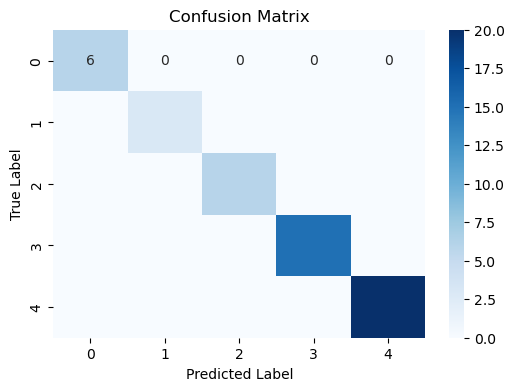

In [123]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### How Does It Work?
The Decision Tree splits data based on specific criteria, aiming to maximize the homogeneity of the target variable in each split.

#### Splitting Criteria:
1. **Gini Impurity**: Measures the probability of incorrect classification of a randomly chosen element.
   - Formula: Gini = 1 - Σ(pᵢ²)
2. **Entropy (Information Gain)**: Measures the reduction in uncertainty after a split.
   - Formula: Entropy = - Σ(pᵢ * log₂(pᵢ))
   - Information Gain = Entropy(Parent) - Weighted Entropy(Children)


Text(0.5, 1.0, 'Best Decision Tree Model from GridSearchCV')

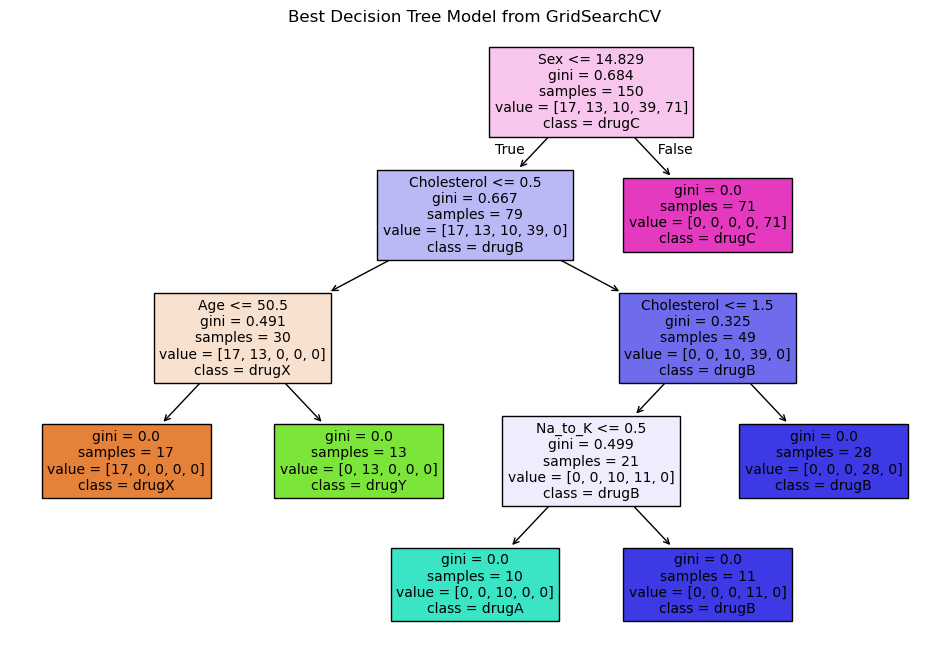

In [125]:
plt.figure(figsize=(12, 8))
plot_tree(model.best_estimator_, feature_names=['Age','Sex','BP','Cholesterol','Na_to_K'],class_names=['drugX','drugY','drugA', 'drugB','drugC'],filled=True, fontsize=10)
plt.title("Best Decision Tree Model from GridSearchCV")

### Advantages:
- Easy to interpret and visualize.
- Handles both numerical and categorical data.
- Requires little data preprocessing (no normalization or scaling).

### Limitations:
- Prone to overfitting, especially with deep trees.
- Small changes in data can result in a completely different tree.
- Less effective with imbalanced datasets.
